In [1]:
import os
from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=16)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss = ['-', '--', '-.']

In [3]:
SAC_ROLLOUT_RETURN_FILENAME = "rollout_return.csv"
SAC_EVALUATION_FILENAME = "evaluation.csv"
SAC_NOISE_STD_FILENAME = "noise_std.txt"
SAC_SEED_FILENAME = "seed.txt"

In [4]:
PD_READ_CSV_ARGS = {
    'header': None,
    'names':'index step return'.split()
}

In [16]:
BASE_DIR = "/home/ajc348/rds/hpc-work/dogo_results/d3rlpy/models/sac"

def load_results(result_path, file):
    return pd.read_csv(
        os.path.join(BASE_DIR, result_path.edir, result_path.pdir, result_path.cdir, file), **PD_READ_CSV_ARGS
    )

def load_text(result_path, file):
    with open(os.path.join(BASE_DIR, result_path.edir, result_path.pdir, file)) as f:
        entry =  f.readline()
    return entry

In [17]:
Experiment = namedtuple('Experiment', 'seed noise_std')
ResultPath = namedtuple('ResultPath', 'edir pdir cdir')
ResultsRecord = namedtuple('ResultsRecord', 'seed noise_std rollout_return evaluation')

In [18]:
RESULTS_MAP = {
    Experiment(1443, 0):     ResultPath('HalfCheetah-v2', '2022.05.10-18:13:40', 'SAC_online_20220510181343'),
    Experiment(1234, 0):     ResultPath('HalfCheetah-v2', '2022.05.10-18:13:41', 'SAC_online_20220510181345'),
    Experiment(4321, 0):     ResultPath('HalfCheetah-v2', '2022.05.10-18:13:42', 'SAC_online_20220510181344'),
    Experiment(1443, 0.1):   ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:29', 'SAC_1443_0.1_20220628193830'),
    Experiment(1234, 0.1):   ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:25', 'SAC_1234_0.1_20220628193826'),
    Experiment(4321, 0.1):   ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:24', 'SAC_4321_0.1_20220628193825'),
    Experiment(1443, 0.01):  ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:26', 'SAC_1443_0.01_20220628193827'),
    Experiment(1234, 0.01):  ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:31', 'SAC_1234_0.01_20220628193833'),
    Experiment(4321, 0.01):  ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:23', 'SAC_4321_0.01_20220628193824'),
    Experiment(1443, 0.001): ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:36', 'SAC_1443_0.001_20220628193838'),
    Experiment(1234, 0.001): ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:28', 'SAC_1234_0.001_20220628193829'),
    Experiment(4321, 0.001): ResultPath('HalfCheetah-v2-Noise', '2022.06.28-19:38:27', 'SAC_4321_0.001_20220628193828'),
}

In [20]:
evaluation_results = {
    k: ResultsRecord(
        seed = load_text(v, SAC_SEED_FILENAME),
        noise_std = load_text(v, SAC_NOISE_STD_FILENAME),
        rollout_return = load_results(v, SAC_ROLLOUT_RETURN_FILENAME),
        evaluation = load_results(v, SAC_EVALUATION_FILENAME),
    )
    for k, v in RESULTS_MAP.items()
}

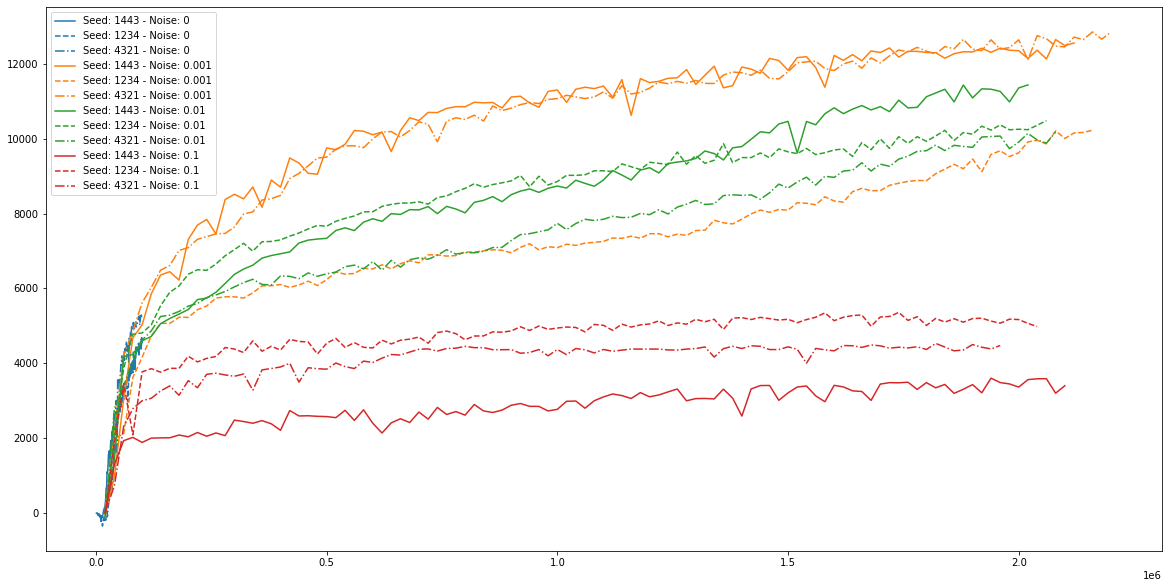

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

noise_std = 0.1
metric = 'evaluation'
for i, noise_std in enumerate([0, 0.001, 0.01, 0.1]):
    for j, seed in enumerate([1443, 1234, 4321]):
        experiment = Experiment(seed=seed, noise_std=noise_std)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Noise: {noise_std}')
ax.legend()

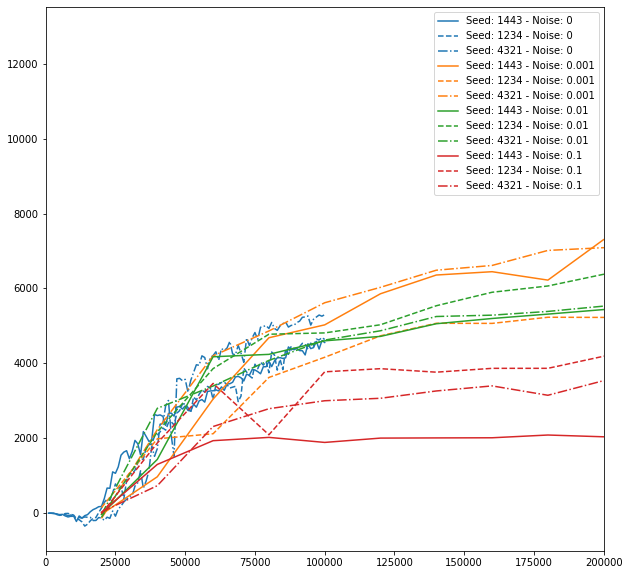

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

noise_std = 0.1
metric = 'evaluation'
for i, noise_std in enumerate([0, 0.001, 0.01, 0.1]):
    for j, seed in enumerate([1443, 1234, 4321]):
        experiment = Experiment(seed=seed, noise_std=noise_std)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Noise: {noise_std}')
ax.set_xlim(0,200000)
ax.legend()

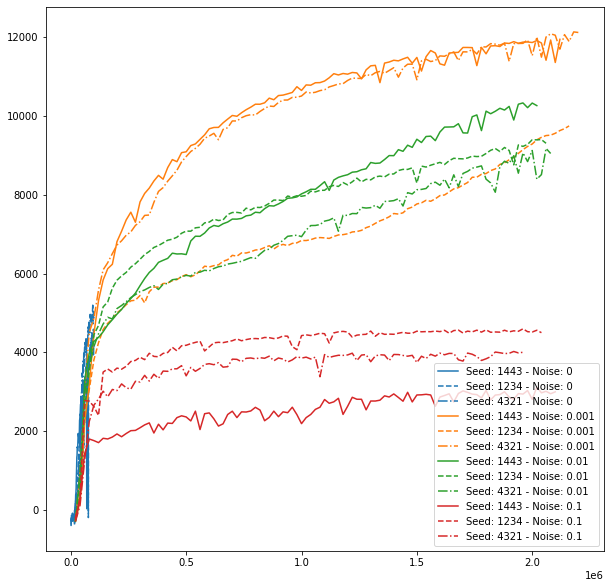

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

noise_std = 0.1
metric = 'rollout_return'
for i, noise_std in enumerate([0, 0.001, 0.01, 0.1]):
    for j, seed in enumerate([1443, 1234, 4321]):
        experiment = Experiment(seed=seed, noise_std=noise_std)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Noise: {noise_std}')
ax.legend()

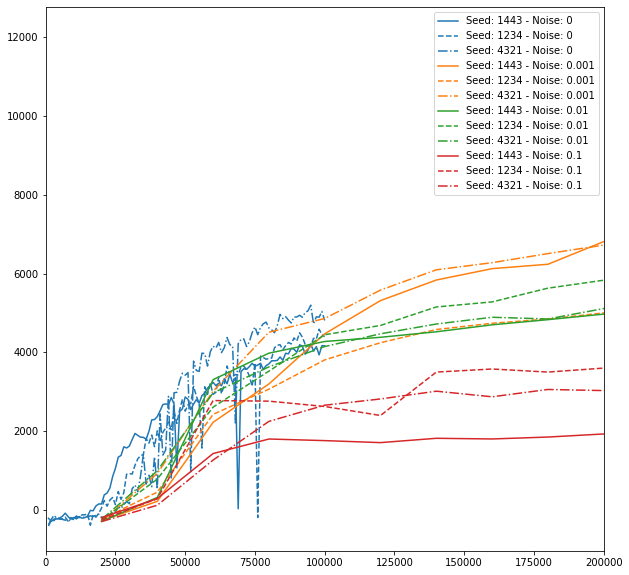

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

noise_std = 0.1
metric = 'rollout_return'
for i, noise_std in enumerate([0, 0.001, 0.01, 0.1]):
    for j, seed in enumerate([1443, 1234, 4321]):
        experiment = Experiment(seed=seed, noise_std=noise_std)
        results_df = getattr(evaluation_results[experiment], metric)
        ax.plot(results_df['step'], results_df['return'], ls=lss[j], c=cols[i], label=f'Seed: {seed} - Noise: {noise_std}')
ax.set_xlim(0,200000)
ax.legend()